In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [3]:
data = pd.read_csv("/home/stranger/Desktop/Heart_Disease_Project/results/cleaned_heart_disease.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,ca_encoded,thal_encoded
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2,3,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1,2,2
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0


In [5]:
X = data.drop(columns=["target"], axis=1)
y = data["target"]

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(len(feature_importances))

13


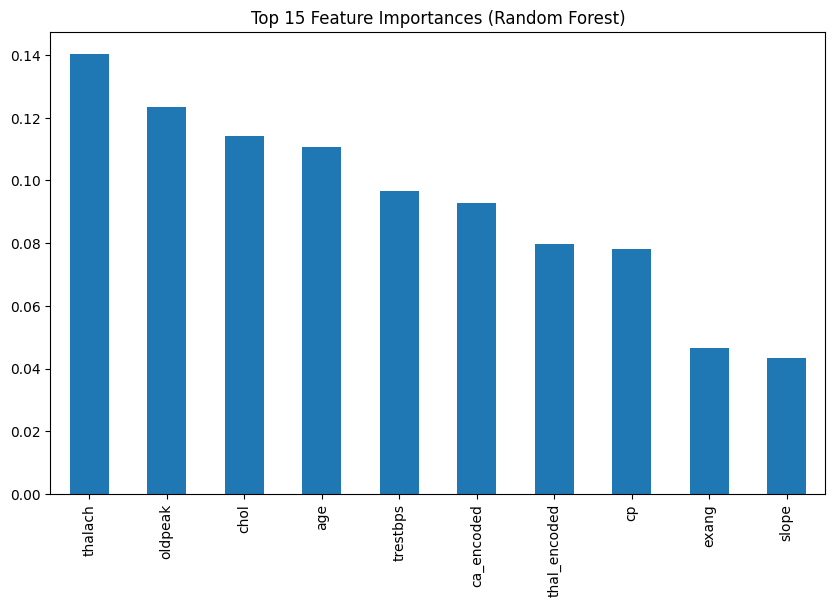

In [13]:
# plot the most important features
plt.figure(figsize=(10,6))
feature_importances[:10].plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)


print("="* 50)
print("Selected Features by RFE:")
selected_rfe = X.columns[fit.support_]
print(selected_rfe)
print("=" * 50)

/home/stranger/miniconda3/envs/Heart_Disease/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/stranger/miniconda3/envs/Heart_Disease/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https:/

Selected Features by RFE:
Index(['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope',
       'ca_encoded', 'thal_encoded'],
      dtype='object')


/home/stranger/miniconda3/envs/Heart_Disease/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_scaled, y)

chi2_features = X.columns[chi2_selector.get_support()]
print("\nTop Features by Chi-Square Test:")
print(chi2_features)


final_features = list(set(selected_rfe).union(set(chi2_features)))
print("\nFinal Selected Features for Modeling:")
print(final_features)


Top Features by Chi-Square Test:
Index(['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca_encoded', 'thal_encoded'],
      dtype='object')

Final Selected Features for Modeling:
['thal_encoded', 'restecg', 'fbs', 'sex', 'thalach', 'age', 'exang', 'cp', 'ca_encoded', 'oldpeak', 'slope']


In [13]:
new_data = data[['thal_encoded', 'restecg', 'fbs', 'sex', 'thalach', 'age', 'exang', 'cp', 'ca_encoded', 'oldpeak', 'slope', 'target']]

In [14]:
new_data.to_csv("selected_data.csv", index=False)